<a href="https://colab.research.google.com/github/tirals88/Deep-Learning/blob/main/1%EA%B6%8C_2%EC%9E%A5_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0_%2B_3%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D(3%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B9%8C%EC%A7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 퍼셉트론 / AND OR NAND 게이트

In [72]:
import numpy as np
import matplotlib.pyplot as plt

𝐲 = {1 (ω1𝑥1+ω2𝑥2 > θ) }

퍼셉트론 동작원리

𝛳 를 -𝒃로 편향

{𝒃 + ω1𝑥1 + ω2𝑥2} > 0 -> 1


In [73]:
x = np.array([0, 1])
w = np.array([.5, .5])
b = -.7
print(w*x)
print(np.sum(w*x))
np.sum(w*x) + b

[0.  0.5]
0.5


-0.19999999999999996

In [74]:
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([.5, .5])
  b = -.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

AND(1, 1)


1

가중치 **ω** 는 입력신호 **𝒙** 가 결과에 주는 영향력(주요도)를 조절하는 매개변수

편향(**𝒃**)은 뉴런이 얼마나 쉽게 활성화하느냐를 조정하는 매개변수

In [75]:
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-.5, -.5])
  b = .8
  tmp = np.sum(w*x) + b
  if tmp >= 0:
    return 1
  else:
    return 0

print(NAND(0, 0))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
0


In [76]:
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([.5, .5])
  b = -.3
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

OR(1, 1)

1

# **XOR 게이트**

---

배타적 논리합 XOR게이트는 x1, x2 중 한 쪽이 1일 때만 1을 출력

위 퍼셉트론들로는 구현이 안됨 ; 선형과 비선형

이를 표현하기 위해 ***다층 퍼셉트론 multi-layer perceptron***을 생성

In [77]:
def XOR(x1, x2):
  s1 = OR(x1,x2)
  s2 = NAND(x1, x2)
  y = AND(s1, s2)
  return y
  
print(XOR(1,0))
print(XOR(1,1))

1
0


OR / NAND 게이트가 1층 / 

AND 게이트가 2층


# 신경망
---
1. 퍼셉트론으로 복잡한 함수도 표현할 수 있다. ( 컴퓨터의 수행능력까지도 퍼셉트론으로 표현이 이론상 가능함 )
2. 가중치를 설정하는 작업이 사람이 수동으로 해야하기에 번거롭다.

신경망은 가중치 매개변수의 적절한 값을 자동으로 학습하는 능력이 있기에 위 단점을 해결할 수 있다.


---


y = h( b + w1x1 + w2x2 )

h(x) = { 0 ( x <= 0 ), 1 ( x > 0 ) } ---  (1) 

h(x) 처럼 입력 신호의 총합을 출력신호로 변환하는 함수를 ***활성화 함수 activation function***라고 함

다시 작성하여

1. a = b + w1x1 + w2x2
2. y = h(a)

a / y 모두 뉴련 or 노드라고 불림

(1)과 같은 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 계단 함수 step fucntion라고 함.

일반적으로 ***단순 퍼셉트론***은 계단 함수를 활성화 함수로 사용한 모델을 가리키고,

***다층 퍼셉트론***은 신경망 ( 여러 층으로 구성되고 시그모이드 함수 등 매끈한 활성화 함수를 사용하는 네트워크 )을 가리킨다.

## 계단 함수 이외의 신경망에서 사용하는 활성화 함수들

***시그모이드 함수 Sigmoid function***

h(x) = 1 / { 1 + exp(-x) }



In [78]:
# 1. 계단 함수 구현
def step_function(x):
  if x >= 1:
    return 2
  if x>= 0:
    return 1 
  else:
    return 0

print(step_function(2))
print(step_function(.5))
print(step_function(-1))

2
1
0


In [79]:
#2. numpy array 삽입
def step_function(x):
  y = x>0
  return (y.astype(np.int), y)

step_function(np.array([1.0, 2.0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


(array([1, 1]), array([ True,  True]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


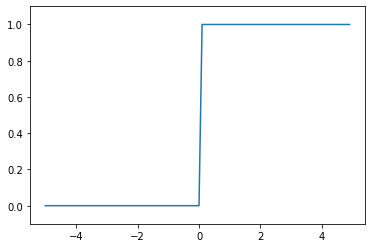

In [80]:
#3. 계단함수의 그래프
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return np.array( x > 0, dtype = np.int)

x = np.arange(-5., 5., .1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-.1, 1.1)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


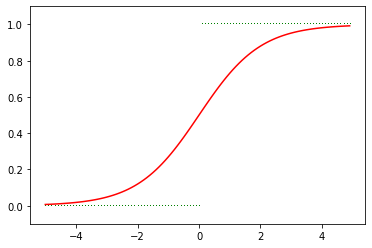

In [81]:
#4. 시그모이드 함수 구현
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5., 5., .1)
y = sigmoid(x)
y2 = np.array(x>0, dtype=np.int)
plt.plot(x, y2, ',g')
plt.plot(x, y, 'r')
plt.ylim(-.1, 1.1)
plt.show()

시그모이드 함수와 계단 함수의 차이점으로는 **매끄러움**이 가장 크다.

또한 계단 함수는 0 또는 1 만을 출력하지만, 시그모이드 함수는 실수를 출력할 수 있으므로 ( 0.122, 0.3333 ) 연속적인 실수가 발생할 수 있다.

+ 계단 함수와 시그모이드 함수 모두 비선형 함수이다.



# ReLU 함수

---

시그모이드 함수보다도 최근에 들어서는 ReLU Rectified Linear Unit 함수를 주로 이용. 

[**Rectified 정류된 / 교류에서 - 흐름을 차단**]

ReLU는 입력이 임계치를 넘으면 그대로 출력하고 임계치를 넘지 못하면 0을 출력하는 함수이다.

h(x) = { x ( x>= 0 ), 0 ( x<0 ) }

In [82]:
def relu(x):
  return np.maximum(0, x)

print(relu(1))
print(relu(-1))

1
0


# 행렬 곱 / 3층 신경망 구현

---

np.dot()

In [83]:
#1. 행렬 곱 Dot
x = np.array([1,2])
w = np.array([[1,3,5], [2,4,6]])
print(x.shape)
print(w)
y = np.dot(x,w)
print(y)

(2,)
[[1 3 5]
 [2 4 6]]
[ 5 11 17]


 #2. 3층 신경망 구현

A = XW + B

x1 / x2 (좌측 노드)

ω1 / ω2 / ω3 (가중치)

a1 / a2 / a3 (우측 노드)

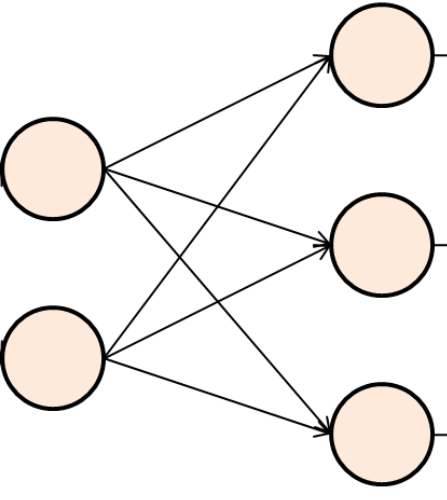

x1 노드 위에 b ( 편향 ) 있다고 가정

A = (a1, a2, a3)

X = (x1, x2)

B = (b1, b2, b3)

W = (w11, w21, w31
     w12, w22, w32)

In [84]:
X = np.array([1., .5])
W1 = np.array([[.1, .3, .5], [.2, .4, .6]])
B1 = np.array([.1, .2, .3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [85]:
#3. 활성화 함수 도입

Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [86]:
#4. 1층에서 2층으로 + 3층으로 신호 전달

W2 = np.array([[.1, .4], [.2, .5], [.3, .6]])
B2 = np.array([.1, .2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

def identify_function(x):
  return x

W3 = np.array([[.1, .3], [.2, .4]])
B3 = np.array([.1, .2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)

print(Y)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]
[0.31682708 0.69627909]


여기서는 항등함수 identify_function을 정의해 사용하였음.
 
이와 같이 출력층에 함수를 정의하며 σ()로 표시 (시그마)

In [87]:
#5. 구현정리

def init_network():
  network = {}
  network['W1'] = np.array([[.1, .3, .5], [.2, .4, .6]])
  network['b1'] = np.array([.1, .2, .3])
  network['W2'] = np.array([[.1, .4], [.2, .5], [.3, .6]])
  network['b2'] = np.array([.1, .2])
  network['W3'] = np.array([[.1, .3], [.2, .4]])
  network['b3'] = np.array([.1, .2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  
  y = identify_function(a3)

  return y

network = init_network()
x = np.array([1., .5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]
